In [227]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [228]:
df = pd.read_csv('Diamonds.csv')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [229]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [231]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [232]:
df.shape

(53940, 10)

<Axes: >

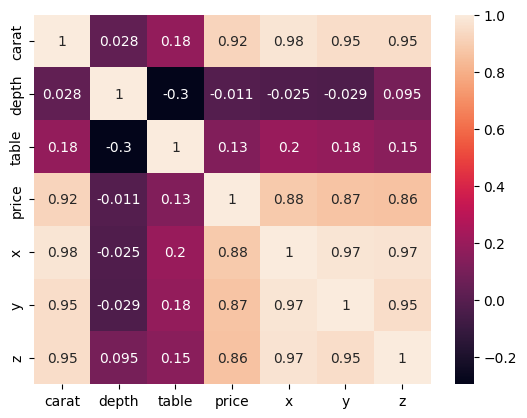

In [233]:
import seaborn as sns

numeric_df = df.select_dtypes(include=["number"])
sns.heatmap(numeric_df.corr(), annot= True)

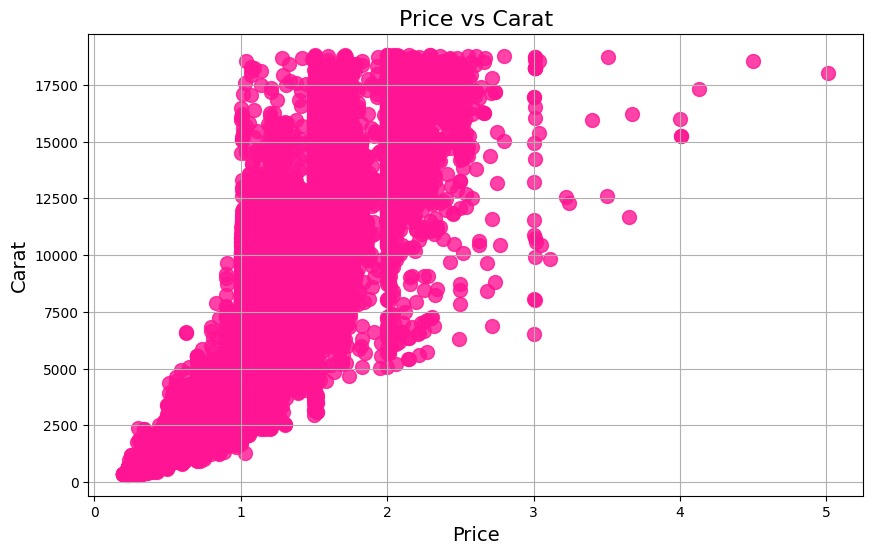

In [234]:
plt.figure(figsize=(10, 6)) 
plt.scatter(df['carat'], df['price'], color='deeppink', alpha=0.8, s=100)  

plt.title('Price vs Carat', fontsize=16)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Carat', fontsize=14)

plt.grid(True)

plt.show()

In [235]:
from sklearn.model_selection import train_test_split

X = np.asanyarray(df[['carat']])
y = np.asanyarray(df[['price']])

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size= 0.2, random_state= 42)

In [236]:
X_train.shape

(43152, 1)

In [237]:
X_test.shape

(10788, 1)

In [238]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree= 3)
X_train_poly = poly.fit_transform(X_train)
X_train_poly

array([[1.      , 2.01    , 4.0401  , 8.120601],
       [1.      , 1.01    , 1.0201  , 1.030301],
       [1.      , 1.1     , 1.21    , 1.331   ],
       ...,
       [1.      , 0.33    , 0.1089  , 0.035937],
       [1.      , 0.9     , 0.81    , 0.729   ],
       [1.      , 1.14    , 1.2996  , 1.481544]], shape=(43152, 4))

In [239]:
clf = linear_model.LinearRegression()
y_train = clf.fit(X_train_poly, y_train)

# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[    0.          1045.08685123  5620.81278124 -1264.3039683 ]]
Intercept:  [-264.89989941]


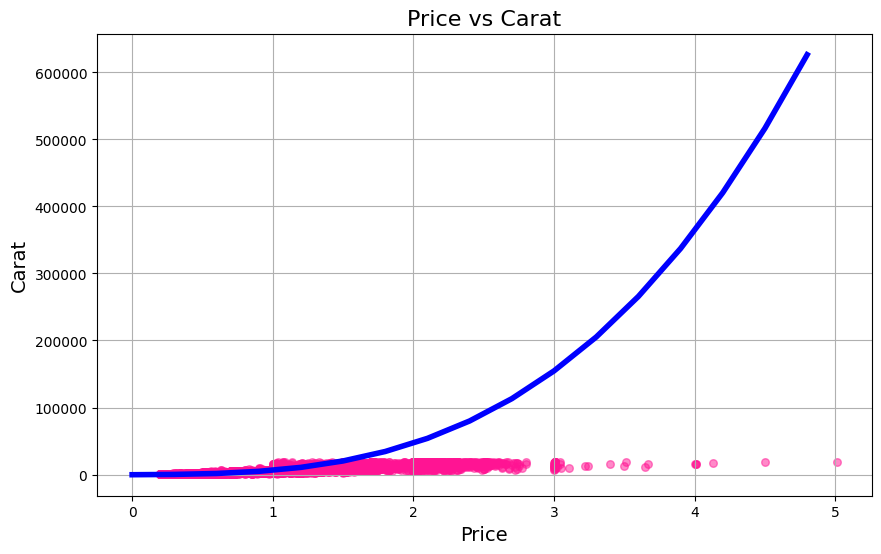

In [240]:

plt.figure(figsize=(10, 6)) 

plt.scatter(df['carat'], df['price'], color='deeppink', alpha=0.5, s=30)  
XX = np.arange(0.0, 5.0, 0.3)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 3)
plt.plot(XX, yy, 'blue' , linewidth=4)
plt.title('Price vs Carat', fontsize=16)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Carat', fontsize=14)

plt.grid(True)
plt.show()


In [241]:
from sklearn.metrics import r2_score

X_train_poly = poly.fit_transform(X_train)

test_x_poly = poly.transform(X_test)

y_test_pred = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(y_test_pred - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_test_pred - y_test) ** 2))
print("R2-score: %.2f" % r2_score(y_test, y_test_pred))


Mean absolute error: 843.44
Residual sum of squares (MSE): 2094315.81
R2-score: 0.87
